In [1]:
# check if the plotly is installed or not
!pip install plotly

In [ ]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

: 

In [9]:
# load the cutomer data
df = pd.read_csv('ArkModified2.csv')
data = df.loc[:, ['hp1', 'attack1', 'defence1']]
data.head


<bound method NDFrame.head of       hp1  attack1  defence1
0     911      212       154
1     975      250       173
2     892      218       148
3     771      243       169
4     864      216       157
..    ...      ...       ...
289   396      137        32
290   414      220        40
291   261       42        16
292   308       81        22
293  1154      208       354

[294 rows x 3 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   代号          294 non-null    object 
 2   英文代号        289 non-null    object 
 3   本名          134 non-null    object 
 4   别号          230 non-null    object 
 5   性别          288 non-null    object 
 6   发色          282 non-null    object 
 7   瞳色          281 non-null    object 
 8   身高          294 non-null    int64  
 9   生日          282 non-null    object 
 10  种族          290 non-null    object 
 11  职业          292 non-null    object 
 12  职能          82 non-null     object 
 13  专精          272 non-null    object 
 14  萌点          278 non-null    object 
 15  出身地区        287 non-null    object 
 16  所属团体        135 non-null    object 
 17  个人状态        42 non-null     object 
 18  角色EP        124 non-null    object 
 19  画师          294 non-null    o

In [10]:
# creating a two dimentional matrix 
x = data.iloc[:,[1,2]].values
x

array([[212, 154],
       [250, 173],
       [218, 148],
       [243, 169],
       [216, 157],
       [195,  54],
       [256, 106],
       [210,  40],
       [249, 154],
       [340, 160],
       [308, 156],
       [452, 116],
       [297, 189],
       [296, 191],
       [288, 186],
       [242, 154],
       [302, 213],
       [473, 130],
       [249, 151],
       [309, 165],
       [161, 239],
       [242, 156],
       [299, 191],
       [298, 224],
       [357,  86],
       [183,  57],
       [397,  68],
       [492,  60],
       [341, 123],
       [178,  61],
       [181,  60],
       [351, 110],
       [535,  79],
       [375,  80],
       [373,  73],
       [498,  54],
       [295, 254],
       [200, 248],
       [221, 257],
       [462, 247],
       [297, 262],
       [370, 229],
       [483, 223],
       [368, 234],
       [269, 258],
       [180,  60],
       [132,  80],
       [167,  94],
       [189,  48],
       [192,  36],
       [148,  47],
       [228,  53],
       [211,

In [12]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++',n_init='auto')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


OSError: [WinError -1066598274] Windows Error 0xc06d007e

In [1]:
# since elbow occured at 5, hence the optimal number of clusters for the mall data is 5 

model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(data)

NameError: name 'KMeans' is not defined

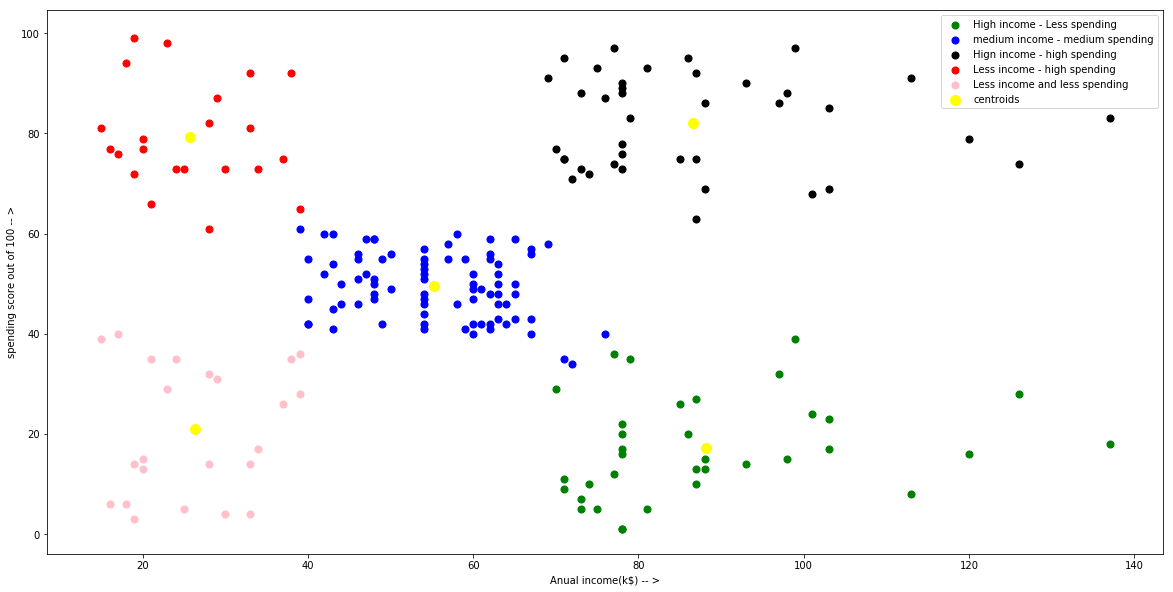

In [8]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "High income - Less spending")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "medium income - medium spending")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Hign income - high spending")
plt.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],s = 50, c = 'red', label = "Less income - high spending")
plt.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],s = 50, c = 'pink', label = "Less income and less spending")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Anual income(k$) -- >")
plt.ylabel("spending score out of 100 -- >")
plt.legend()
plt.show()

**Now I'm going to include 3 independant variables such as age, anual income and the spending score in segmentation algorithm.**

In [9]:
# input matrix for segmentation
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values

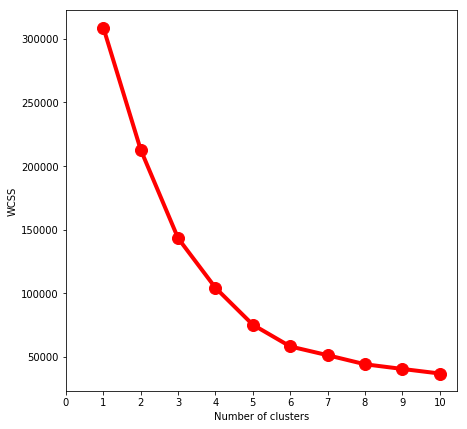

In [10]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

From the above elbow method, we can see that the optimal number of clusters == 5


In [11]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

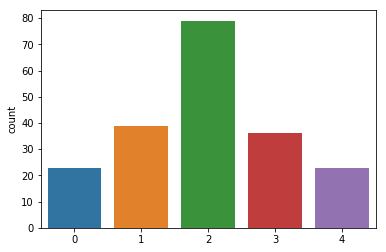

In [12]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

From the above countplot we can see that there are more number of customers in the cluster 2(green color).
same colors are used to plot the clusters(In 3d scatter plot below).

In [13]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

20
16
6


In [6]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()


NameError: name 'x' is not defined

: 

: 

In [15]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

** Work in progress....**

Please upvote if you like this.